In [58]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [15]:
df=pd.read_excel('./Telecom Churn Rate Dataset.xlsx')

## 1. Customer Profile:

### a. What is the distribution of customers based on gender?

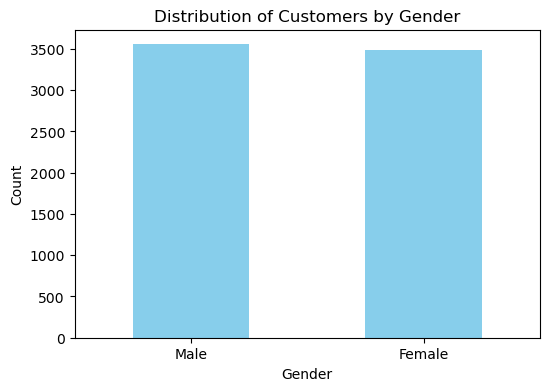

In [18]:
gender_counts = df['gender'].value_counts()


plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


### b. How many senior citizens are using the telecom services?

In [19]:
senior_citizen_count = df[df['SeniorCitizen'] == 1].shape[0]

print("Number of Senior Citizens using the Telecom Services:", senior_citizen_count)


Number of Senior Citizens using the Telecom Services: 1142


In [20]:
senior_citizens_percentage = (df['SeniorCitizen'].sum() / len(df)) * 100

print(f"The percentage of senior citizens using the telecom services is: {senior_citizens_percentage:.2f}%")


The percentage of senior citizens using the telecom services is: 16.21%


### c. How many customers have partners or dependents?

In [33]:
customers_with_partner = df[df['Partner'] == 'Yes'].shape[0]
customers_with_dependents = df[df['Dependents'] == 'Yes'].shape[0]

print(f"The number of customers with partners: {customers_with_partner}")
print(f"The number of customers with dependents: {customers_with_dependents}")


The number of customers with partners: 3402
The number of customers with dependents: 2110


## 2. Customer Behavior:

### a. What is the average tenure of customers?

In [34]:
average_tenure = df['tenure'].mean()

print(f"The average tenure of customers is: {average_tenure:.2f} months")


The average tenure of customers is: 32.37 months


### b. How many customers have phone service and multiple lines?

In [35]:
customers_with_phone_service = df[df['PhoneService'] == 'Yes'].shape[0]
customers_with_multiple_lines = df[df['MultipleLines'] == 'Yes'].shape[0]

print(f"The number of customers with phone service: {customers_with_phone_service}")
print(f"The number of customers with multiple lines: {customers_with_multiple_lines}")


The number of customers with phone service: 6361
The number of customers with multiple lines: 2971


### c. What are the most popular internet service options among customers?

In [36]:
internet_service_counts = df['InternetService'].value_counts()

most_popular_service = internet_service_counts.idxmax()

print(f"The most popular internet service option among customers is: {most_popular_service}")


The most popular internet service option among customers is: Fiber optic


### d. How many customers have opted for additional features like online security, online backup, device protection, and tech support?

In [37]:
customers_with_online_security = df[df['OnlineSecurity'] == 'Yes'].shape[0]
customers_with_online_backup = df[df['OnlineBackup'] == 'Yes'].shape[0]
customers_with_device_protection = df[df['DeviceProtection'] == 'Yes'].shape[0]
customers_with_tech_support = df[df['TechSupport'] == 'Yes'].shape[0]

print(f"The number of customers with online security: {customers_with_online_security}")
print(f"The number of customers with online backup: {customers_with_online_backup}")
print(f"The number of customers with device protection: {customers_with_device_protection}")
print(f"The number of customers with tech support: {customers_with_tech_support}")


The number of customers with online security: 2019
The number of customers with online backup: 2429
The number of customers with device protection: 2422
The number of customers with tech support: 2044


### e. How many customers use streaming services for TV and movies?

In [38]:
customers_using_streaming_tv = df[df['StreamingTV'] == 'Yes'].shape[0]
customers_using_streaming_movies = df[df['StreamingMovies'] == 'Yes'].shape[0]

print(f"The number of customers using streaming services for TV: {customers_using_streaming_tv}")
print(f"The number of customers using streaming services for movies: {customers_using_streaming_movies}")


The number of customers using streaming services for TV: 2707
The number of customers using streaming services for movies: 2732


### 3. Contract and Billing:

### a. What types of contracts (e.g., month-to-month, one-year, two-year) do customers prefer?

In [39]:
contract_counts = df['Contract'].value_counts()

print("Contract types and their frequencies:")
for contract_type, count in contract_counts.items():
    print(f"{contract_type}: {count}")


Contract types and their frequencies:
Month-to-month: 3875
Two year: 1695
One year: 1473


### b. What percentage of customers opt for paperless billing?

In [42]:
paperless_billing_percentage = (df['PaperlessBilling'].value_counts(normalize=True)['Yes']) * 100

print(f"The percentage of customers opting for paperless billing is: {paperless_billing_percentage:.2f}%")


The percentage of customers opting for paperless billing is: 59.22%


### c. Which payment methods are commonly used by customers?

In [43]:
payment_method_counts = df['PaymentMethod'].value_counts()

print("Commonly used payment methods:")
for payment_method, count in payment_method_counts.items():
    print(f"{payment_method}: {count}")


Commonly used payment methods:
Electronic check: 2365
Mailed check: 1612
Bank transfer (automatic): 1544
Credit card (automatic): 1522


### d. How do monthly charges vary across different services and customer profiles?

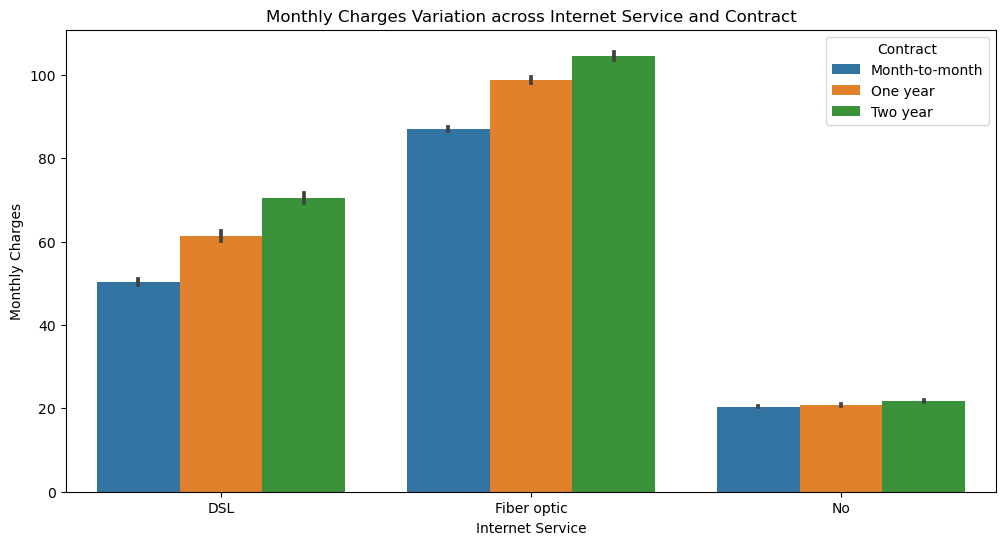

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='InternetService', y='MonthlyCharges', hue='Contract', data=df)
plt.title('Monthly Charges Variation across Internet Service and Contract')
plt.xlabel('Internet Service')
plt.ylabel('Monthly Charges')
plt.show()


### e. What is the distribution of total charges among customers?

ValueError: Unable to parse string " " at position 488

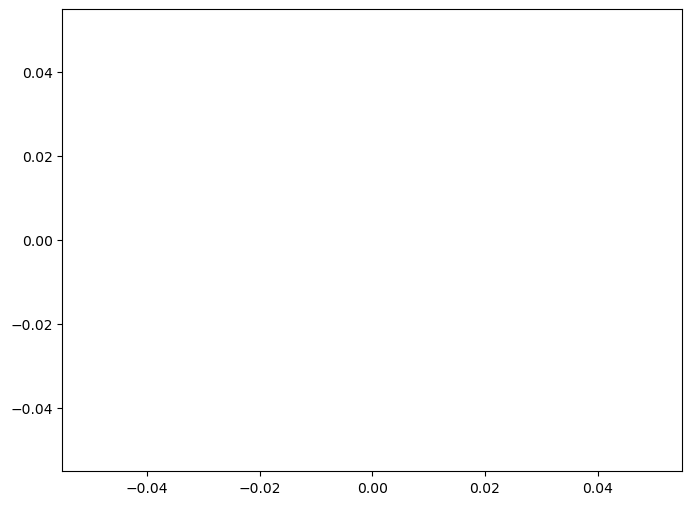

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='TotalCharges', kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.show()


## 4. Churn Analysis:

### a. How many customers have churned (i.e., canceled their services)?

In [47]:
churned_customers = df[df['Churn'] == 'Yes'].shape[0]

print(f"The number of customers who have churned: {churned_customers}")


The number of customers who have churned: 1869


### b. Are there any specific patterns or trends associated with customers who churn?

In [48]:
churn_rate = df['Churn'].value_counts(normalize=True)['Yes']
print(f"Churn Rate: {churn_rate * 100:.2f}%")


Churn Rate: 26.54%


In [50]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

for column in categorical_columns:
    churn_by_category = df.groupby(column)['Churn'].value_counts(normalize=True)[:, 'Yes']
    print(f"Churn Rate by {column}:")
    print(churn_by_category)
    print()


Churn Rate by gender:
gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64

Churn Rate by SeniorCitizen:
SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64

Churn Rate by Partner:
Partner
No     0.329580
Yes    0.196649
Name: Churn, dtype: float64

Churn Rate by Dependents:
Dependents
No     0.312791
Yes    0.154502
Name: Churn, dtype: float64

Churn Rate by PhoneService:
PhoneService
No     0.249267
Yes    0.267096
Name: Churn, dtype: float64

Churn Rate by MultipleLines:
MultipleLines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: Churn, dtype: float64

Churn Rate by InternetService:
InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64

Churn Rate by OnlineSecurity:
OnlineSecurity
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn, dtype: float64

Churn Rate by OnlineBackup:
OnlineB

In [51]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in numerical_columns:
    churned_stats = df[df['Churn'] == 'Yes'][column].describe()
    non_churned_stats = df[df['Churn'] == 'No'][column].describe()

    print(f"Churned Customers - {column}:")
    print(churned_stats)
    print()

    print(f"Non-Churned Customers - {column}:")
    print(non_churned_stats)
    print()


Churned Customers - tenure:
count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

Non-Churned Customers - tenure:
count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

Churned Customers - MonthlyCharges:
count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

Non-Churned Customers - MonthlyCharges:
count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

Churned Customers - TotalCharges:
count     1869.0
uniqu

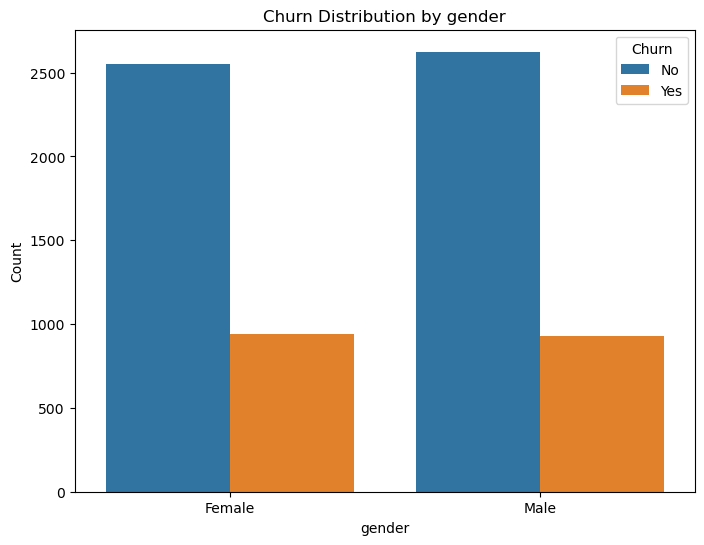

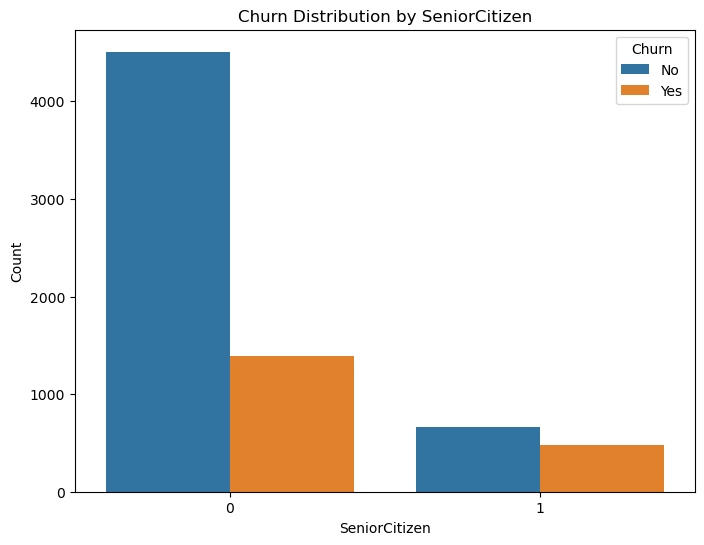

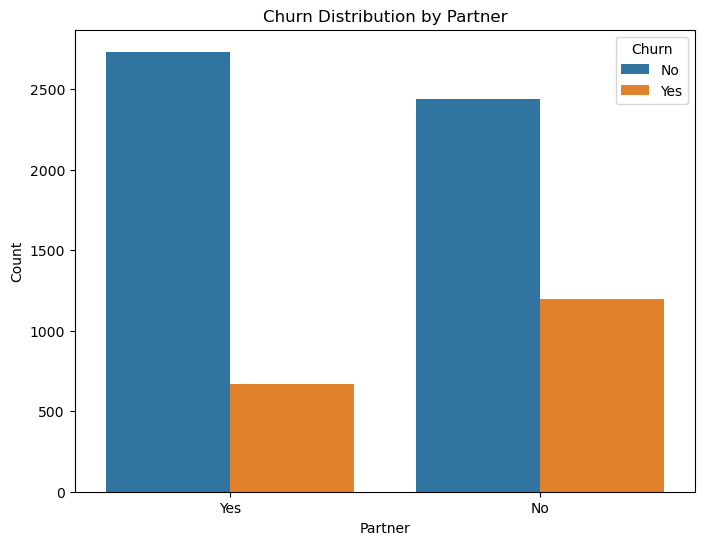

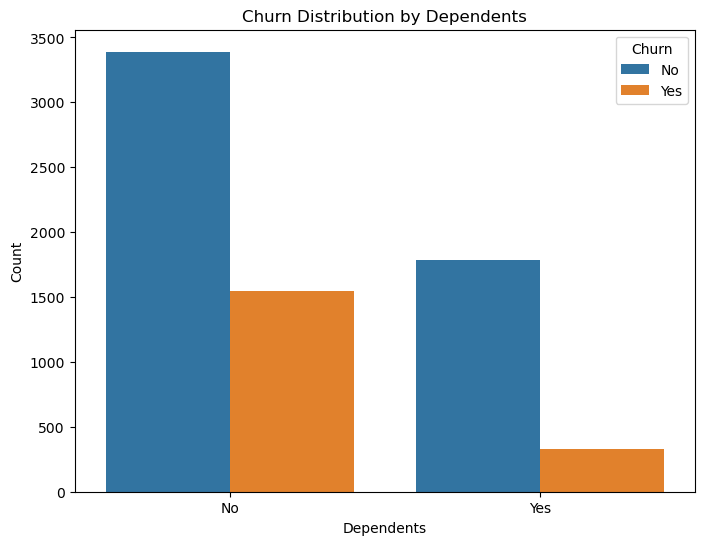

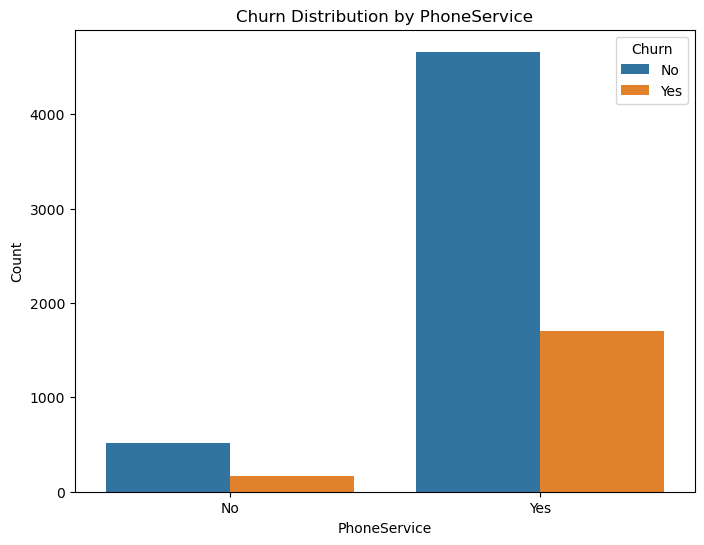

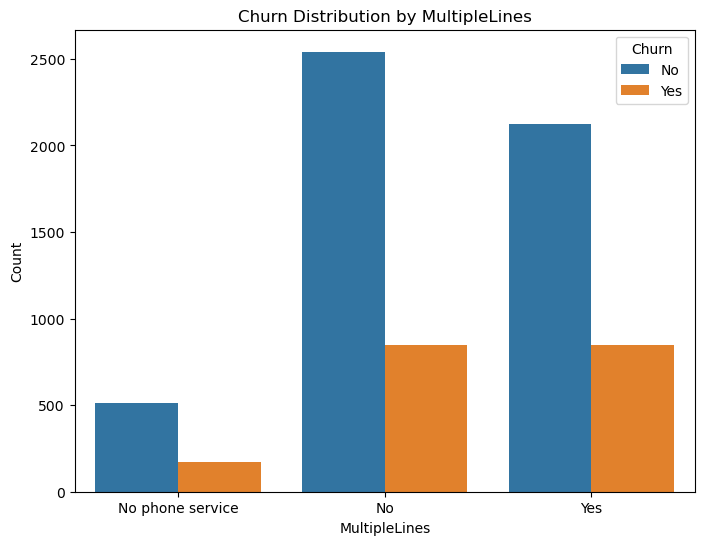

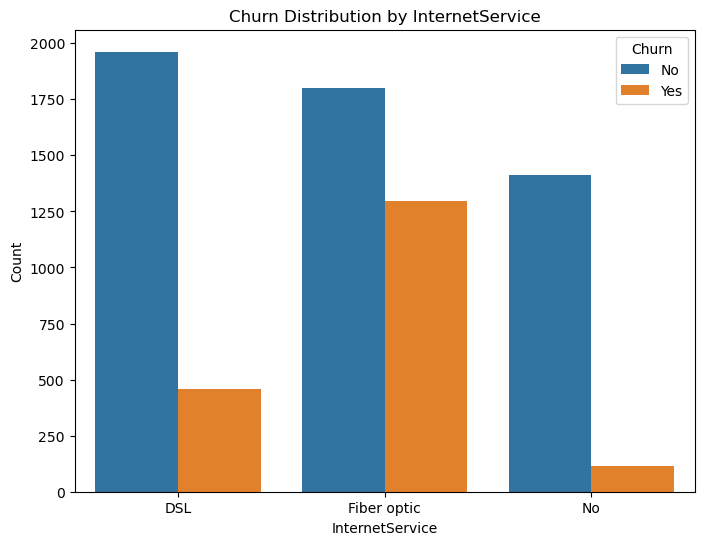

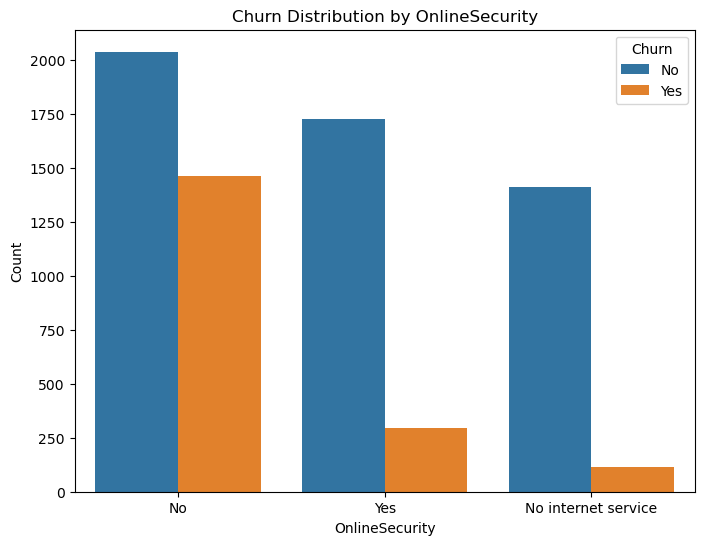

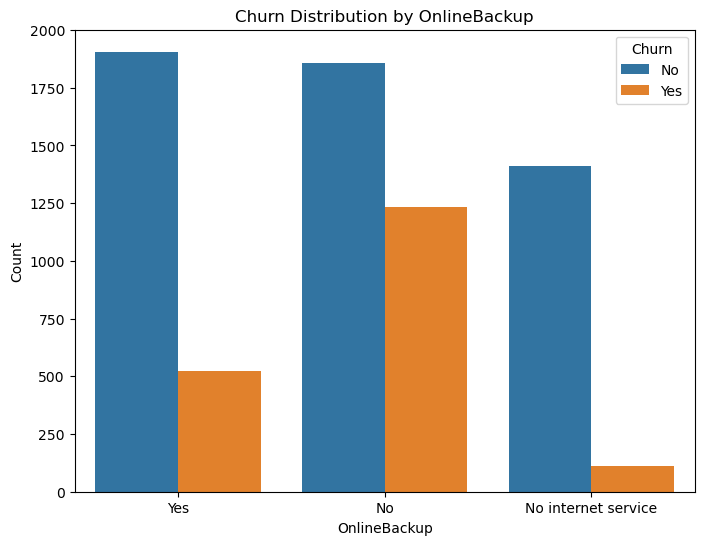

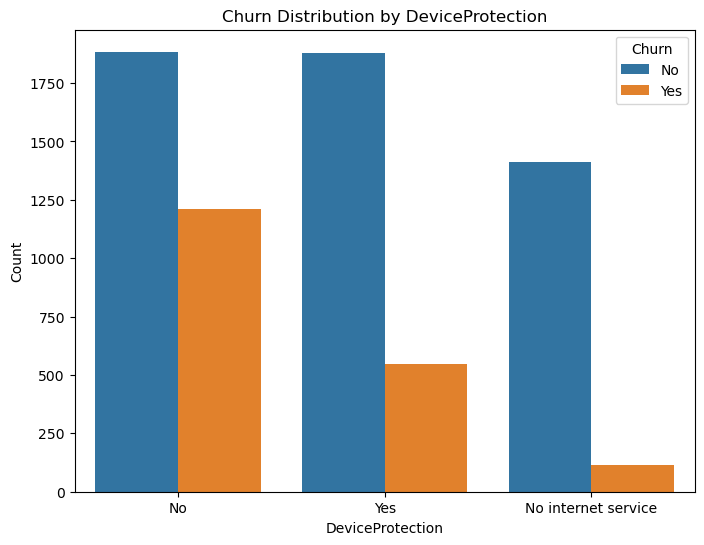

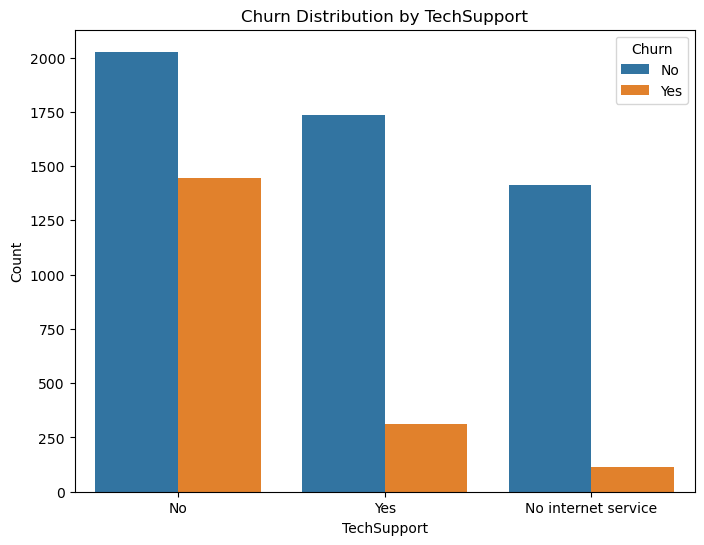

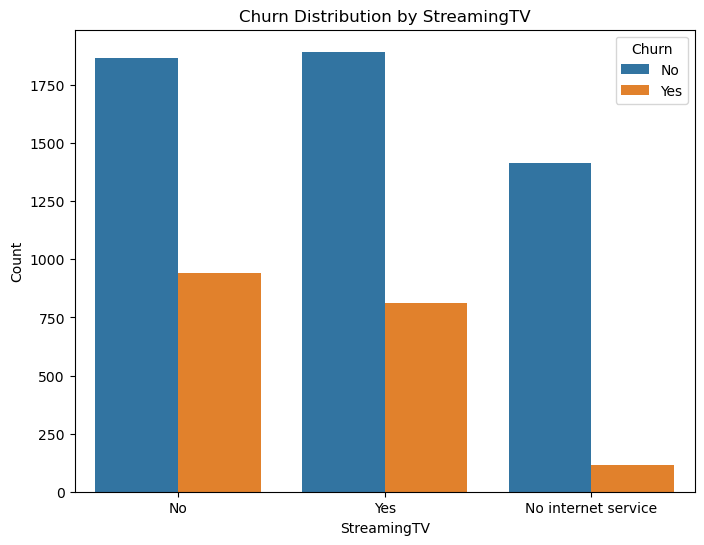

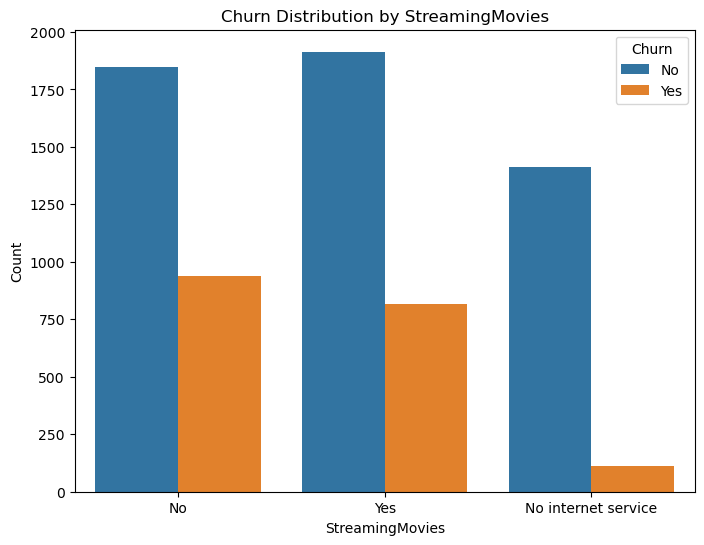

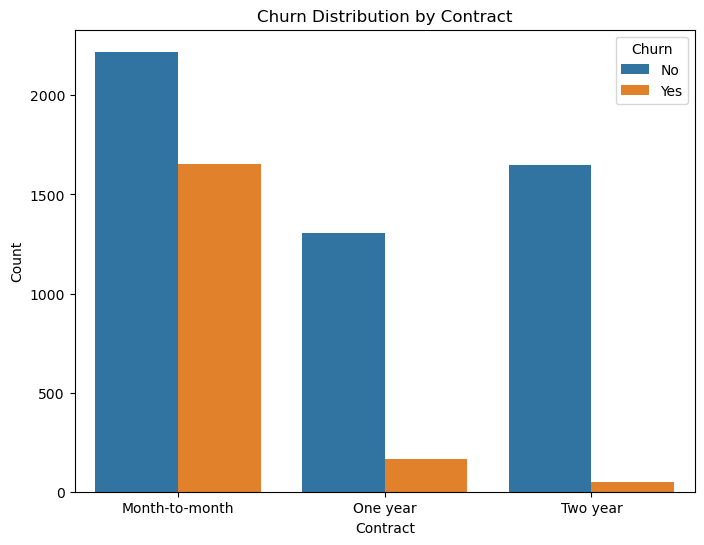

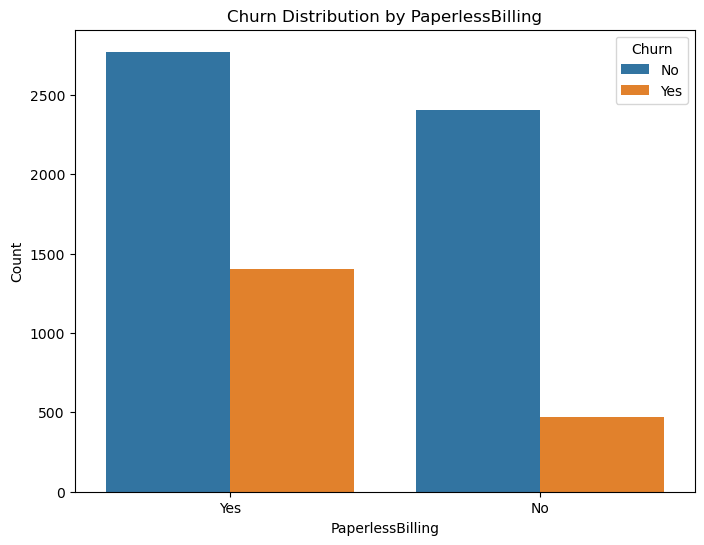

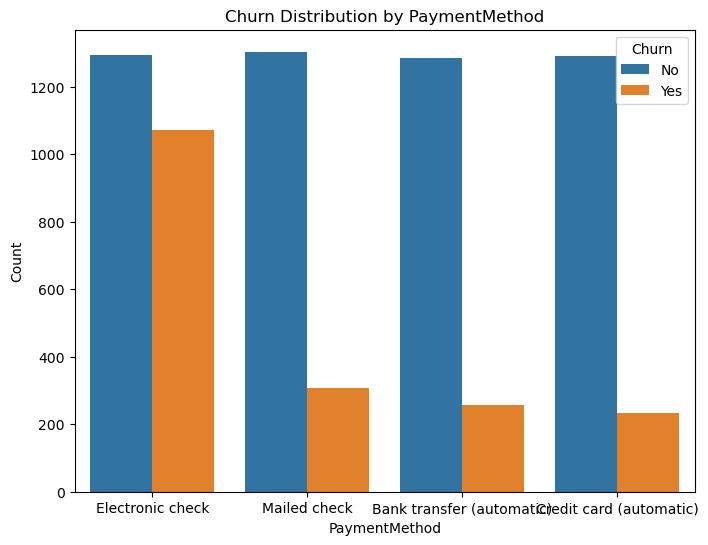

In [52]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, hue='Churn')
    plt.title(f"Churn Distribution by {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


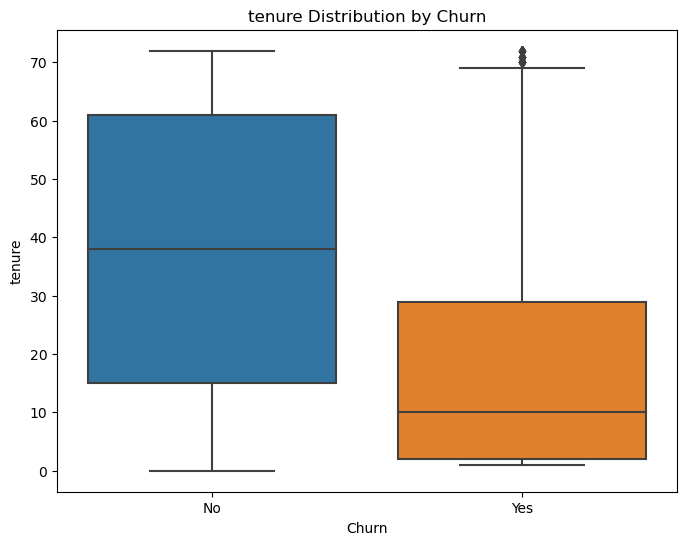

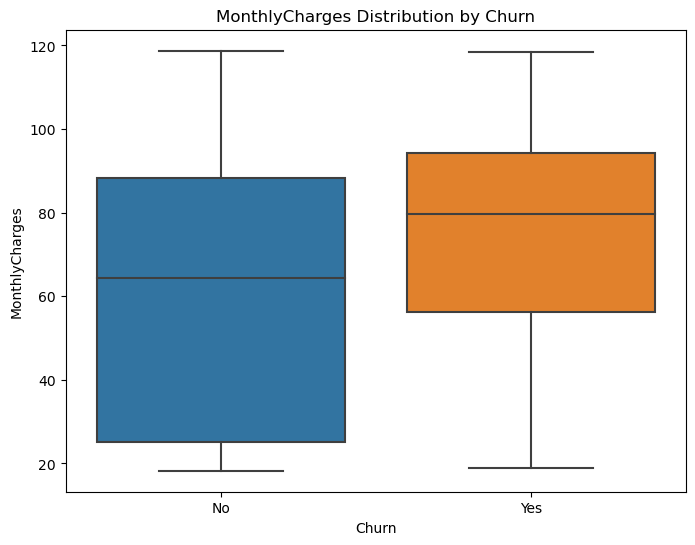

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 800x600 with 0 Axes>

In [53]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Churn', y=column)
    plt.title(f"{column} Distribution by Churn")
    plt.xlabel("Churn")
    plt.ylabel(column)
    plt.show()


### c. What is the relationship between churn and other variables, such as contract type, monthly charges, or total charges?

In [54]:
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True)[:, 'Yes']
print("Churn Rate by Contract Type:")
print(churn_by_contract)

Churn Rate by Contract Type:
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


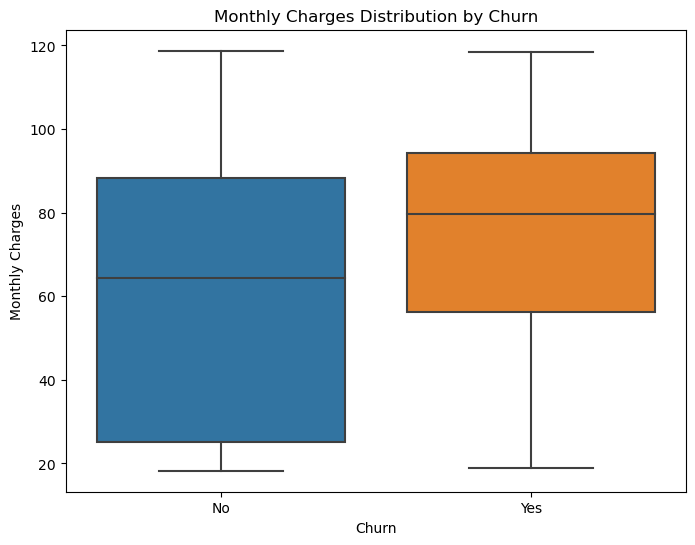

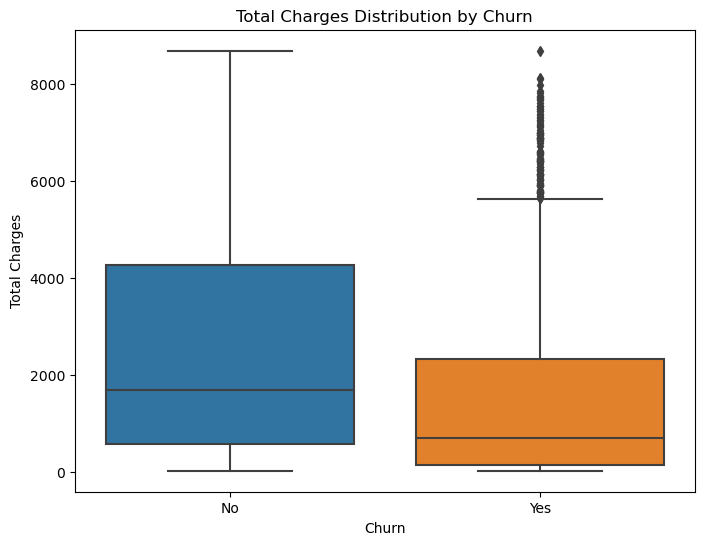

In [56]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Total Charges Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()


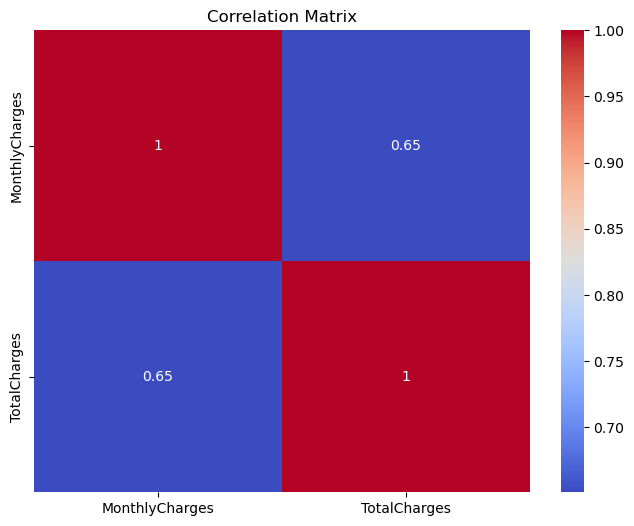

In [57]:
correlation_matrix = df[['Churn', 'MonthlyCharges', 'TotalCharges']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### d. Can we identify any factors that significantly impact customer churn?

In [62]:
#?????

## Some useful graphs

### How does churn rate vary based on internet service type?
Graphical representation: Bar plot

In [65]:
df['CHURN'] = df.Churn.replace({'No':0, 'Yes':1})

In [67]:
churn_by_internet = df.groupby(['InternetService'])['CHURN'].sum()

In [71]:
churn_by_internet = churn_by_internet.reset_index()

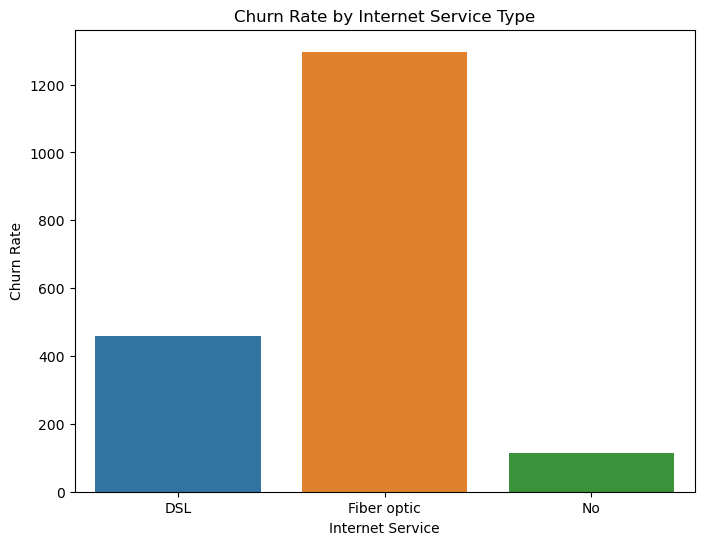

In [72]:
plt.figure(figsize=(8, 6))
sns.barplot(data=churn_by_internet, x='InternetService', y='CHURN')
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate')
plt.show()

### What is the distribution of monthly charges for churned and non-churned customers?

Graphical representation: Box plot

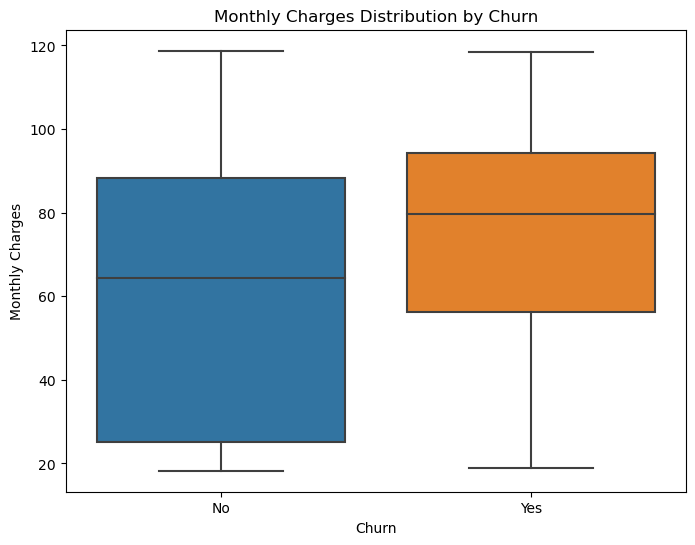

In [73]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

### How does churn rate differ for customers with and without online security?
Graphical representation: Bar plot


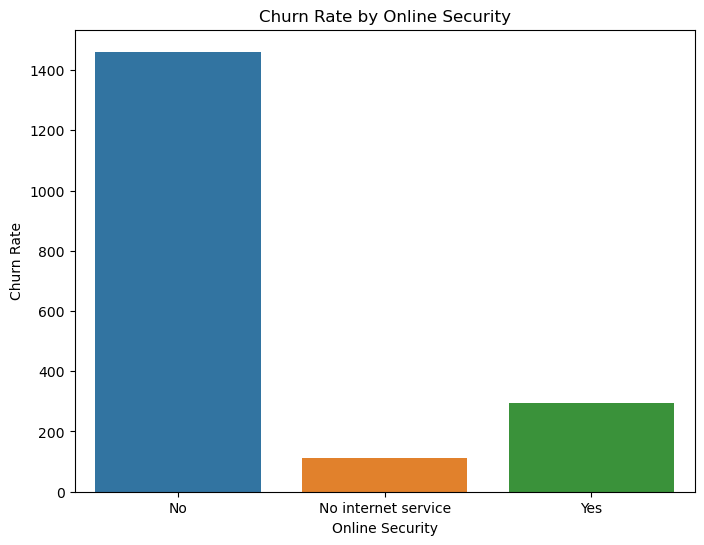

In [77]:
churn_by_security = df.groupby('OnlineSecurity')['CHURN'].sum().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(data=churn_by_security, x='OnlineSecurity', y='CHURN')
plt.title('Churn Rate by Online Security')
plt.xlabel('Online Security')
plt.ylabel('Churn Rate')
plt.show()

### What is the distribution of tenure for churned and non-churned customers?
Graphical representation: Box plot


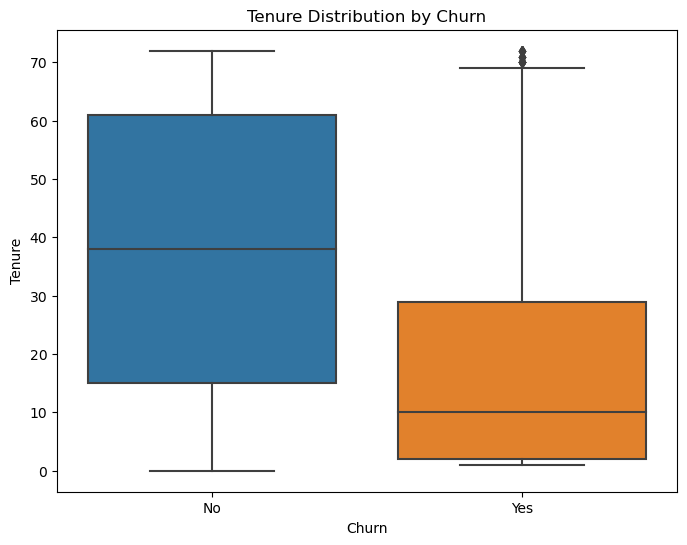

In [78]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

### How does churn rate vary across different payment methods?
Graphical representation: Bar plot


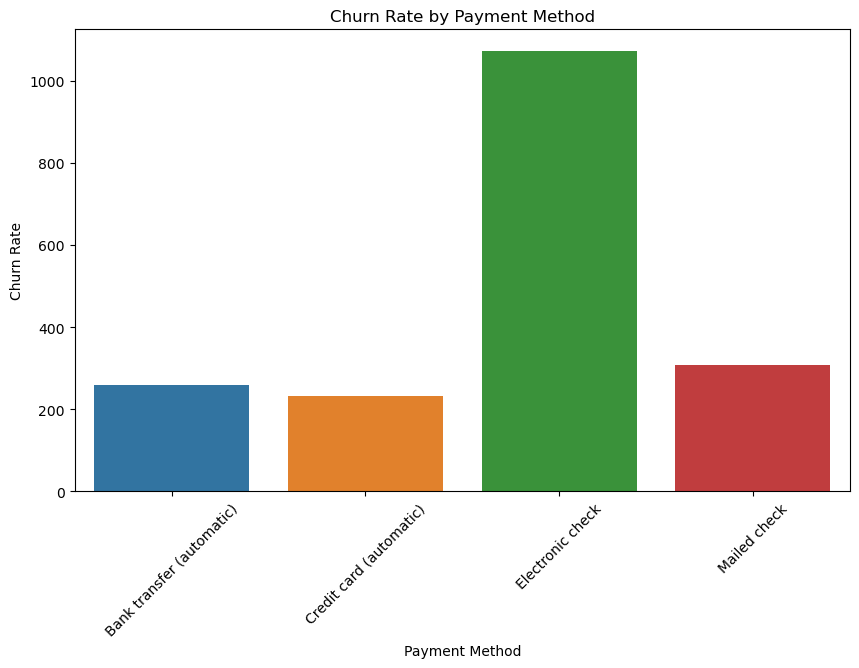

In [81]:
churn_by_payment = df.groupby('PaymentMethod')['CHURN'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=churn_by_payment, x='PaymentMethod', y='CHURN')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

### What is the distribution of total charges for churned and non-churned customers?
Graphical representation: Box plot


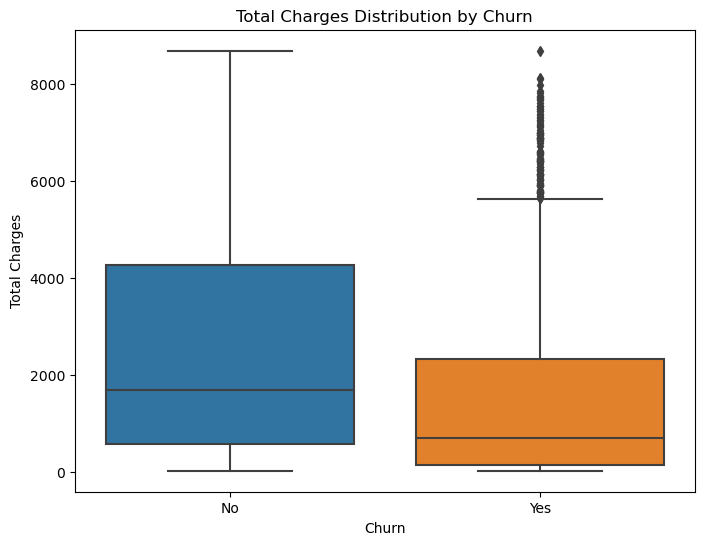

In [85]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Total Charges Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()


### How does churn rate differ for customers with and without paperless billing?
Graphical representation: Bar plot


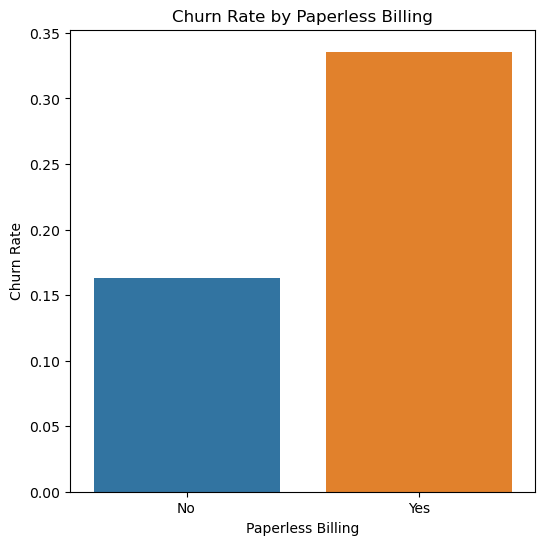

In [83]:
churn_by_paperless = df.groupby('PaperlessBilling')['CHURN'].mean().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(data=churn_by_paperless, x='PaperlessBilling', y='CHURN')
plt.title('Churn Rate by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Churn Rate')
plt.show()

### What is the distribution of monthly charges for customers with different contract types?
Graphical representation: Box plot


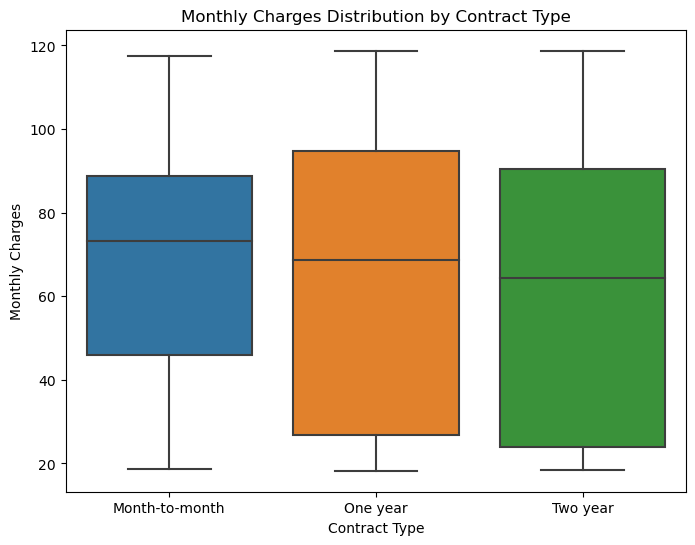

In [86]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges')
plt.title('Monthly Charges Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()

### How does churn rate vary based on the presence of device protection?
Graphical representation: Bar plot


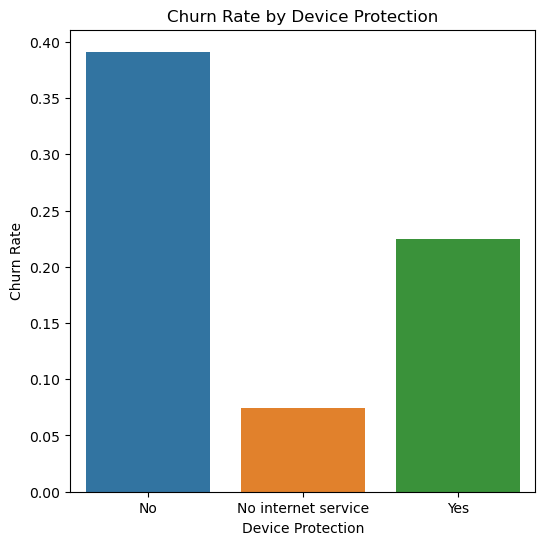

In [87]:
churn_by_device_protection = df.groupby('DeviceProtection')['CHURN'].mean().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(data=churn_by_device_protection, x='DeviceProtection', y='CHURN')
plt.title('Churn Rate by Device Protection')
plt.xlabel('Device Protection')
plt.ylabel('Churn Rate')
plt.show()

### What is the distribution of total charges for customers with different internet service types?
Graphical representation: Box plot


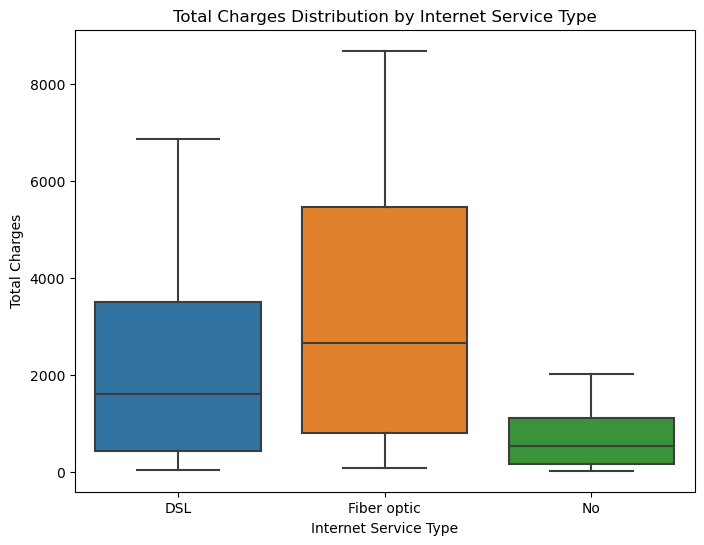

In [88]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='InternetService', y='TotalCharges')
plt.title('Total Charges Distribution by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Total Charges')
plt.show()